# Лабораторная работа №5. Глазков Олег Игоревич

Импорт библиотек

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Диабетический датасет, предвариетельный анализ

In [203]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
df = pd.read_csv('/content/drive/My Drive/Data/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [206]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [207]:
df.shape

(768, 9)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [209]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [210]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## LASSO регрессия

Разделяем датасет на переменную `X` - переменные, которые используются для предсказания `y`.

И `y` - зависимую переменную.

In [213]:
X = df.iloc[:,[3, 5]].values
X[:5]

array([[35. , 33.6],
       [29. , 26.6],
       [ 0. , 23.3],
       [23. , 28.1],
       [35. , 43.1]])

In [214]:
y = df.iloc[:, 4].values
y[:5]

array([  0,   0,   0,  94, 168])

Немного подготовим данные - применим StandardScaler к тренировочным данным

In [215]:
from sklearn.preprocessing import StandardScaler

ssx = StandardScaler()
Xss = ssx.fit_transform(X)

Xss[:5,:]

array([[ 0.90726993,  0.20401277],
       [ 0.53090156, -0.68442195],
       [-1.28821221, -1.10325546],
       [ 0.15453319, -0.49404308],
       [ 0.90726993,  1.4097456 ]])

Разделим датасет на тренировочные и тестовые множества

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xss, y, test_size=0.2)
X_train[:5]

array([[-0.09637905, -0.64634617],
       [-1.28821221, -0.25289651],
       [ 0.02907707, -0.96364429],
       [ 0.27998931,  0.58477051],
       [ 1.03272605,  0.20401277]])

In [217]:
y_test

array([165,   0, 105,  74,   0, 207,   0, 114,   0,   0,  94, 415, 228,
         0,   0,   0,   0,   0,   0, 271,  76, 245, 170,  87,   0,   0,
       100,   0,   0,   0,  49,  66,  92,   0, 120,   0,   0, 120,   0,
         0,   0,   0,   0, 180,   0,   0,   0, 148,   0,   0, 105,   0,
       130,   0,   0,   0, 100,   0,   0,  63,  41,  60,  57, 387, 140,
       402,   0,   0, 191,   0, 310,  95,   0,   0,   0,   0,   0,   0,
         0,   0, 145, 144,   0,  45, 180,   0,   0, 115,   0,   0,   0,
         0,  94,   0, 110, 155,   0,  73, 270,   0,   0, 280, 680,  85,
         0, 275,   0, 130,   0, 175, 132, 120,   0,  29,   0,  57,  32,
       326,   0, 240, 144,  78, 318,   0, 100, 110, 485, 120,  84, 330,
       127,   0,   0,   0, 190,  52,  68,   0,  14,  78, 105,  56,   0,
        53,   0,   0,   0,   0,  49, 210,  99,   0,   0, 285])

In [218]:
len(X_train)

614

In [219]:
len(X_test)

154

In [220]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha=0.1)

Обучим

In [221]:
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.1)

Выведем точность предсказания на тренировочных и на тестовых данных

In [222]:
print('Точность предсказания на тренировочных данных: ', lassoreg.score(X_train, y_train))
print('Точность предсказания на тестовых данных: ', lassoreg.score(X_test, y_test))

Точность предсказания на тренировочных данных:  0.22497964028694406
Точность предсказания на тестовых данных:  0.04390576395869428


## Линейная регрессия

In [223]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()

linearreg.fit(X_train, y_train)

print('Точность предсказания на тренировочных данных: ', linearreg.score(X_train, y_train))
print('Точность предсказания на тестовых данных: ', linearreg.score(X_test, y_test))

Точность предсказания на тренировочных данных:  0.22498076318777327
Точность предсказания на тестовых данных:  0.0434873609436367


## Ridge регрессия

In [224]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0.1)

ridgereg.fit(X_train, y_train)

print('Точность предсказания на тренировочных данных: ', ridgereg.score(X_train, y_train))
print('Точность предсказания на тестовых данных: ', ridgereg.score(X_test, y_test))

Точность предсказания на тренировочных данных:  0.22498075665564632
Точность предсказания на тестовых данных:  0.04352225335331683


## ElasticNet регрессия

In [225]:
from sklearn.linear_model import ElasticNet

elastreg = ElasticNet(alpha=0.1)

elastreg.fit(X_train, y_train)

print('Точность предсказания на тренировочных данных: ', elastreg.score(X_train, y_train))
print('Точность предсказания на тестовых данных: ', elastreg.score(X_test, y_test))

Точность предсказания на тренировочных данных:  0.22442193025873725
Точность предсказания на тестовых данных:  0.05323294112732213


## Полиномиальная регрессия

In [226]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=2)
x_poly = poly_model.fit_transform(Xss)

linearreg2 = LinearRegression()

linearreg2.fit(X_train, y_train)

print('Точность предсказания на тренировочных данных: ', linearreg2.score(X_train, y_train))
print('Точность предсказания на тестовых данных: ', linearreg2.score(X_test, y_test))

Точность предсказания на тренировочных данных:  0.22498076318777327
Точность предсказания на тестовых данных:  0.0434873609436367


In [227]:
poly_model = PolynomialFeatures(degree=5)
x_poly = poly_model.fit_transform(Xss)

linearreg5 = LinearRegression()

linearreg5.fit(X_train, y_train)

print('Точность предсказания на тренировочных данных: ', linearreg5.score(X_train, y_train))
print('Точность предсказания на тестовых данных: ', linearreg5.score(X_test, y_test))

Точность предсказания на тренировочных данных:  0.22498076318777327
Точность предсказания на тестовых данных:  0.0434873609436367


In [228]:
poly_model = PolynomialFeatures(degree=10)
x_poly = poly_model.fit_transform(Xss)

linearreg10 = LinearRegression()

linearreg10.fit(X_train, y_train)

print('Точность предсказания на тренировочных данных: ', linearreg10.score(X_train, y_train))
print('Точность предсказания на тестовых данных: ', linearreg10.score(X_test, y_test))

Точность предсказания на тренировочных данных:  0.22498076318777327
Точность предсказания на тестовых данных:  0.0434873609436367


## Логистическая регрессия. Эксперимент вне задания

In [229]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

X передадим массив Glucose и BMI

In [249]:
X = df.iloc[:, [1, 5]].values
X[:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

y - значение Outcome

In [250]:
y = df.iloc[:, -1].values
y[:5]

array([1, 0, 1, 0, 1])

In [251]:
ssx2 = StandardScaler()
X2 = ssx2.fit_transform(X)

X2[:5,:]

array([[ 0.84832379,  0.20401277],
       [-1.12339636, -0.68442195],
       [ 1.94372388, -1.10325546],
       [-0.99820778, -0.49404308],
       [ 0.5040552 ,  1.4097456 ]])

In [252]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2)
X2_train[:5]

array([[ 0.7857295 , -0.506735  ],
       [ 0.41016376,  0.43246741],
       [-0.43485916, -0.30366421],
       [ 0.1597866 , -0.41789153],
       [ 1.16129525,  1.30821021]])

In [253]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X2_train, y2_train)

LogisticRegression()

In [254]:
classifier.score(X2_train, y2_train)

0.755700325732899

In [255]:
classifier.score(X2_test, y2_test)

0.7857142857142857

In [256]:
y_prediction = classifier.predict(X2_test)

In [257]:
from sklearn.metrics import accuracy_score

accuracy_score(y2_test, y_prediction)

0.7857142857142857

<ipython-input-259-0889577e4505>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


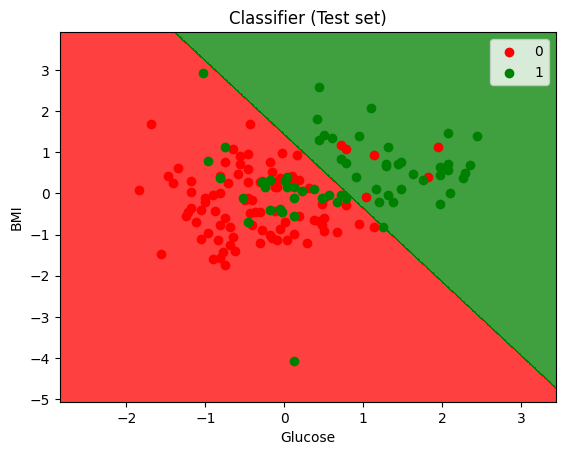

In [259]:
from matplotlib.colors import ListedColormap

X_set, y_set = X2_test, y2_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1,
                               stop = X_set[:,0].max() + 1,
                               step=0.01),
                     np.arange(start = X_set[:,1].min() - 1,
                               stop = X_set[:,1].max() + 1,
                               step=0.01))

# X1.ravel()
plt.contourf(X1, X2, classifier.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap= ListedColormap(('red', 'green'))
    )

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Classifier (Test set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()